<a href="https://colab.research.google.com/github/ShashankGowdaL69/6thSem-ML-Lab/blob/main/Logistic_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

      satisfaction_level  last_evaluation  number_project  \
left                                                        
0               0.666810         0.715473        3.786664   
1               0.440098         0.718113        3.855503   

      average_montly_hours  time_spend_company  Work_accident  \
left                                                            
0               199.060203            3.380032       0.175009   
1               207.419210            3.876505       0.047326   

      promotion_last_5years  
left                         
0                  0.026251  
1                  0.005321  


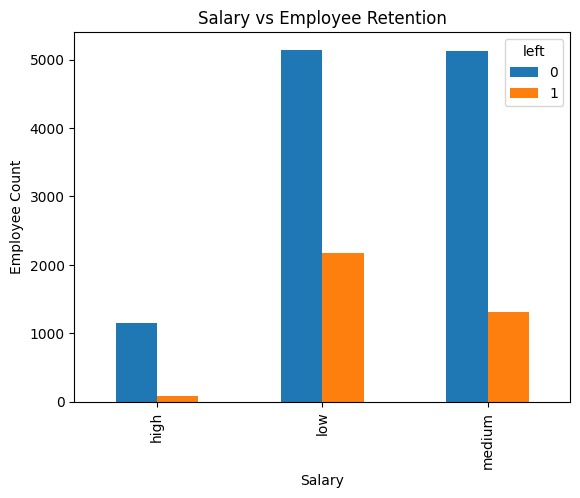

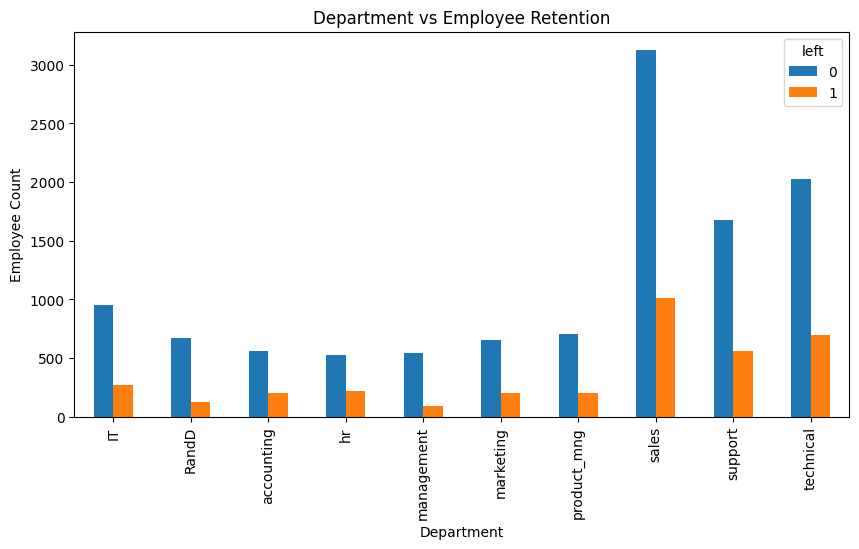

Accuracy: 0.762


In [5]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score

# Load dataset
df = pd.read_csv("HR_comma_sep.csv")

# EDA
print(df.groupby('left').mean(numeric_only=True))

# Salary vs retention
pd.crosstab(df.salary, df.left).plot(kind='bar')
plt.title("Salary vs Employee Retention")
plt.xlabel("Salary")
plt.ylabel("Employee Count")
plt.show()

# Department vs retention
pd.crosstab(df.Department, df.left).plot(kind='bar', figsize=(10,5))
plt.title("Department vs Employee Retention")
plt.xlabel("Department")
plt.ylabel("Employee Count")
plt.show()

# Feature Selection
subdf = df[['satisfaction_level',
            'average_montly_hours',
            'promotion_last_5years',
            'salary']]

# Convert categorical salary
salary_dummies = pd.get_dummies(subdf.salary, prefix="salary")
X = pd.concat([subdf.drop('salary', axis=1), salary_dummies], axis=1)

y = df.left

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

Accuracy: 0.9523809523809523


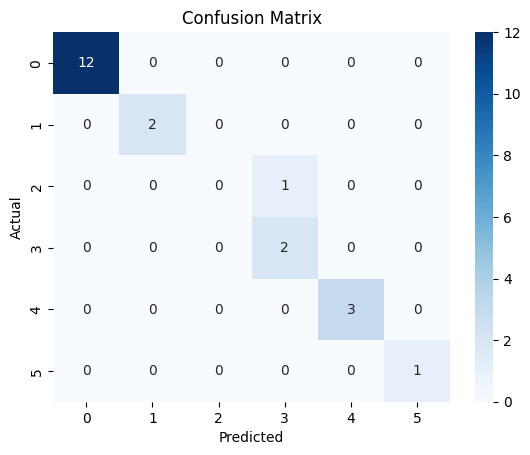

In [4]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix

# Load dataset
zoo = pd.read_csv("zoo-data.csv")

# Preprocessing
zoo.drop('animal_name', axis=1, inplace=True)

X = zoo.drop('class_type', axis=1)
y = zoo['class_type']

# Train Test Split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42)

# Model
model = LogisticRegression(max_iter=1000)
model.fit(X_train, y_train)

# Accuracy
y_pred = model.predict(X_test)
print("Accuracy:", accuracy_score(y_test, y_pred))

# Confusion Matrix
cm = confusion_matrix(y_test, y_pred)

sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel("Predicted")
plt.ylabel("Actual")
plt.title("Confusion Matrix")
plt.show()